In [ ]:
pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd /content/drive/MyDrive/resnet_svm
# !unzip /content/drive/MyDrive/resnet_svm/data.zip

In [ ]:
import numpy as np
import pandas as pd
from keras_applications.resnet import ResNet50, preprocess_input

# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
#import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
#from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
# from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input
import os

In [ ]:
directory = "/content/drive/MyDrive/resnet_svm/data"

categories = ['shoe', 'sandle', 'boot']

In [ ]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
        
size_data

<ipython-input-6-3269ec0e3dbe>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'shoe': {'102 x 136': 430},
 'sandle': {'102 x 136': 428, '102 x 135': 2},
 'boot': {'102 x 136': 430}}

shoe


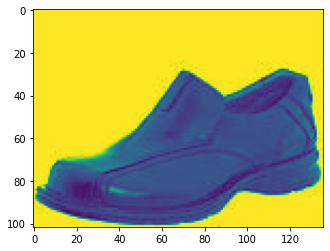

sandle


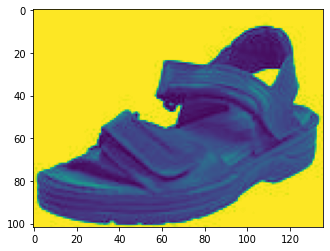

boot


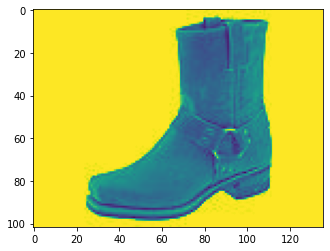

In [ ]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

In [ ]:
# model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
from keras.preprocessing import image
import keras
from tensorflow.keras.preprocessing import image

In [ ]:
# import tensorflow as tf
# import os
# import cv2
# import numpy as np

# # Load ResNet-50 model
# resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# # Loop through image categories
# for category in os.listdir(directory):
#     path = os.path.join(directory, category)
#     class_num = categories.index(category)
    
#     # Loop through image files
#     for file in os.listdir(path):
#         filepath = os.path.join(path, file)
#         print(category, filepath)
        
#         # Load image and preprocess
#         img = cv2.imread(filepath)
#         img = cv2.resize(img, (224, 224))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = tf.keras.applications.resnet50.preprocess_input(img)
#         img = np.expand_dims(img, axis=0)
        
#         # Compute ResNet-50 features and image dimensions
#         features = resnet.predict(img)
#         height, width, _ = img[0].shape
        
#         # Do something with features and dimensions
#         print(features.shape, height, width)


In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import pandas as pd

# LBP parameters
radius = 1
n_points = 8 * radius

# Load ResNet-50 model
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Initialize feature list and label list
features_list = []
labels_list = []

# Loop through image categories
for category in os.listdir(directory):
    path = os.path.join(directory, category)
    class_num = categories.index(category)
    
    # Loop through image files
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(category, filepath)
        
        # Load image and preprocess
        img = cv2.imread(filepath)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = tf.keras.applications.resnet50.preprocess_input(img)
        img = np.expand_dims(img, axis=0)
        
        # Compute ResNet-50 features and image dimensions
        resnet_features = resnet.predict(img).flatten()
        height, width, _ = img[0].shape
        
        # Compute LBP features
        gray = cv2.cvtColor(img[0], cv2.COLOR_RGB2GRAY)
        lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
        lbp_hist, _ = np.histogram(lbp, bins=256, range=(0, 255))
        lbp_features = lbp_hist / np.sum(lbp_hist)
        
        # Concatenate features and add to feature list
        all_features = np.concatenate((resnet_features, lbp_features, [height, width]))
        features_list.append(all_features)
        labels_list.append(category)
        
# Convert feature and label lists to pandas dataframes and write to CSV file
features_df = pd.DataFrame(features_list)
labels_df = pd.DataFrame(labels_list, columns=['class'])
df = pd.concat([labels_df, features_df], axis=1)
df.to_csv('/content/drive/MyDrive/resnet_svm/data/features.csv', index=False)

shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (118).jpg
1/1 [==============================] - 9s 9s/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (157).jpg
1/1 [==============================] - 0s 29ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (112).jpg
1/1 [==============================] - 0s 26ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (169).jpg
1/1 [==============================] - 0s 27ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (128).jpg
1/1 [==============================] - 0s 28ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (190).jpg
1/1 [==============================] - 0s 28ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (221).jpg
1/1 [==============================] - 0s 29ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (163).jpg
1/1 [==============================] - 0s 26ms/step
shoe /content/drive/MyDrive/resnet_svm/data/shoe/Shoe (179).jpg
1/1 [=====

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/resnet_svm/data/features.csv')

KeyboardInterrupt: ignored

In [ ]:
df.head()

In [ ]:
# img_path = '/content/asad.jpeg'
# img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract the ResNet50 features for the input image
features = model.predict(x)

# Print the shape of the extracted features
print(features.shape)

1/1 [==============================] - 0s 231ms/step
(1, 7, 7, 2048)


In [ ]:
img = image.load_img(img_path)
width, height = img.size
print(f"Image width: {width}, Image height: {height}")


Image width: 1024, Image height: 665


In [ ]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

# Load and convert the input image to grayscale
img = image.load_img(img_path)
gray = rgb2gray(img)

# Compute the LBP features for the grayscale image
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius)

# Print the shape of the LBP features
print(lbp.shape)


(665, 1024)


In [ ]:
# Set up image preprocessing function
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load your images and extract ResNet50 features
image_paths = ["asad.jpeg"]
features = []
for path in image_paths:
    x = preprocess_image(path)
    resnet_features = model.predict(x)
    features.append(resnet_features.flatten())

# Convert features list to a dataframe
df = pd.DataFrame(features)

# Save features to a CSV file
df.to_csv("resnet50_features.csv", index=False)


1/1 [==============================] - 2s 2s/step


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,100342,100343,100344,100345,100346,100347,100348,100349,100350,100351
0,0.0,3.20545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
